In [2]:
import numpy as np
from matplotlib import pyplot
import pandas as pd



In [3]:
data= pd.read_csv("dataset/cancer-dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
print(data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>],
       [<Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>],
       [<Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>]], dtype=object)

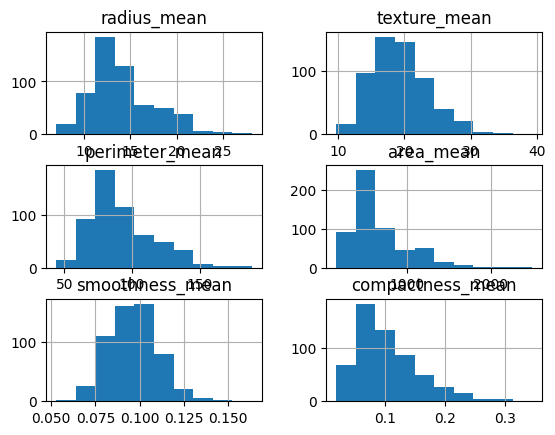

In [17]:
visualize= data[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean"]]
visualize.hist()

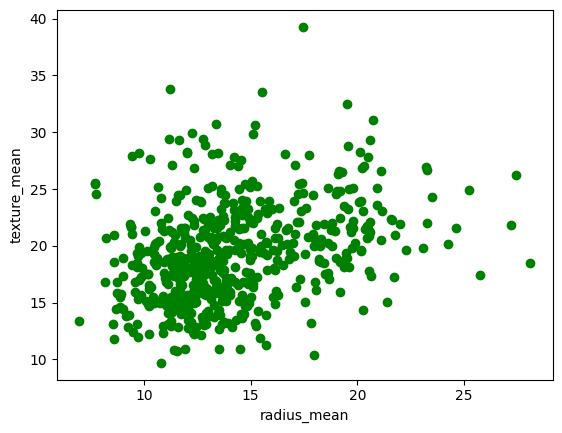

In [18]:
pyplot.scatter(data.radius_mean,data.texture_mean, color="green")
pyplot.xlabel("radius_mean")
pyplot.ylabel("texture_mean")
pyplot.show()


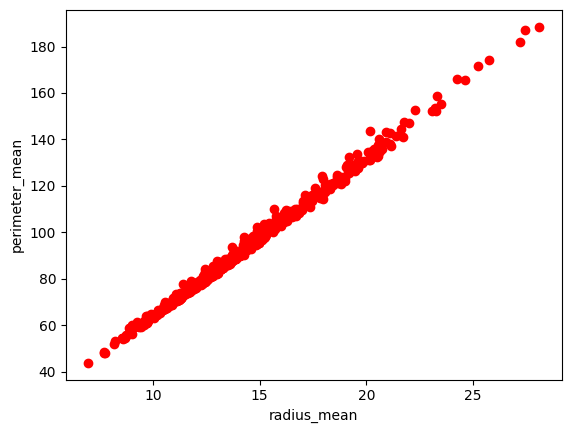

In [19]:
pyplot.scatter(data.radius_mean,data.perimeter_mean, color='red')
pyplot.xlabel("radius_mean")
pyplot.ylabel("perimeter_mean")
pyplot.show()

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
X=data.iloc[:,2].values.reshape(1,-1)
Y=data.iloc[:,3].values.reshape(1,-1)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)
regr= linear_model.LinearRegression()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

0.060306275490965754
0.9963727223702226
Coefficients:  [[6.86458423]]


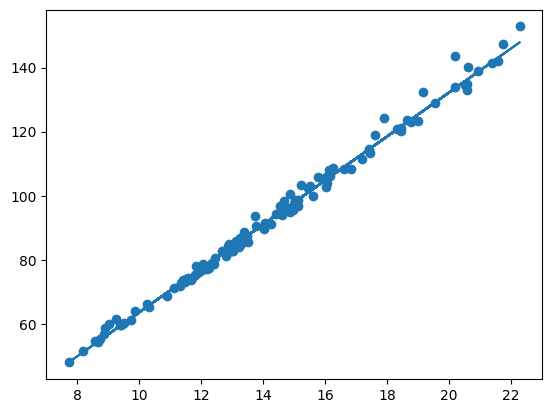

In [21]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X=data['radius_mean'].to_numpy().reshape(-1,1)
y=data['perimeter_mean'].to_numpy().reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regre= linear_model.LinearRegression()
regre.fit(X_train,y_train)
pre= regre.predict(X_test)
print(np.mean(pre-y_test)**2)
print(regre.score(X_train,y_train))
print ('Coefficients: ', regre.coef_)
pyplot.scatter(X_test,y_test)
pyplot.plot(X_test,pre)


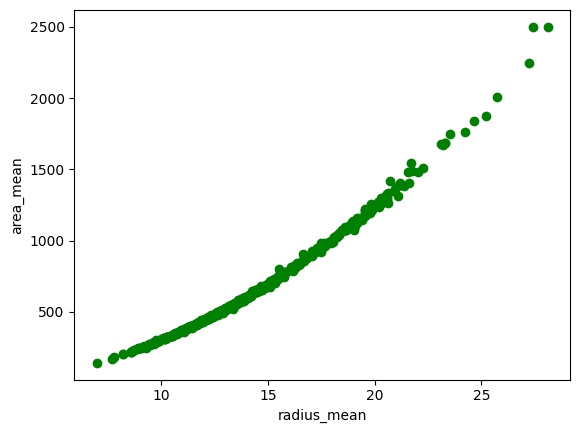

In [ ]:
pyplot.scatter(data.radius_mean, data.area_mean,color='green')
pyplot.xlabel("radius_mean")
pyplot.ylabel("area_mean")
pyplot.show()